# EDA 

In [55]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
veg_meat = ["#454d66", "#b7e778", "#1fab89"]
sns.set_palette(veg_meat)
from statistics import median  

In [101]:
df = pd.read_csv('RAW_recipes.csv')
dff = pd.read_csv('RAW_interactions.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [25]:
df.head()


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [26]:
df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


In [27]:
#### Notice dat submiited collum gotta change it to date time

In [28]:
df['submitted'] = pd.to_datetime(df['submitted'])

In [29]:
#### Lets deal with  missing values 

In [30]:
df.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [31]:
cleandf = df.dropna()

In [32]:
df = cleandf

In [33]:
df.isnull().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64

In [34]:
df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = df.nutrition.str.split(",",expand=True) 

In [35]:
df['calories'] =  df['calories'].apply(lambda x: x.replace('[','')) 

In [36]:
df['carbohydrates'] =  df['carbohydrates'].apply(lambda x: x.replace(']','')) 

In [37]:
df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype('float')

In [38]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


<AxesSubplot:>

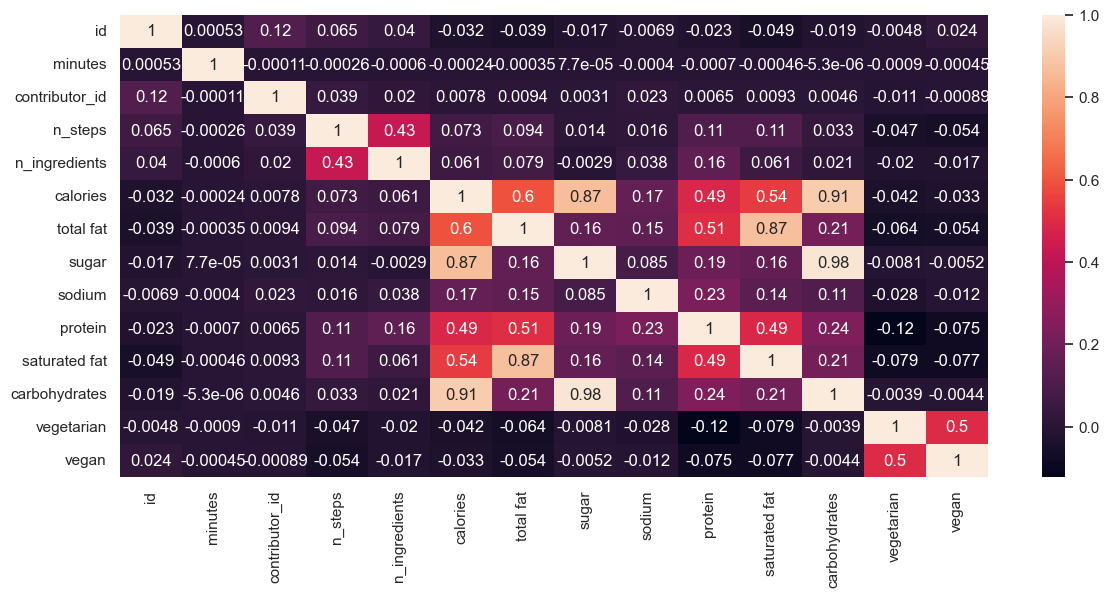

In [90]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)

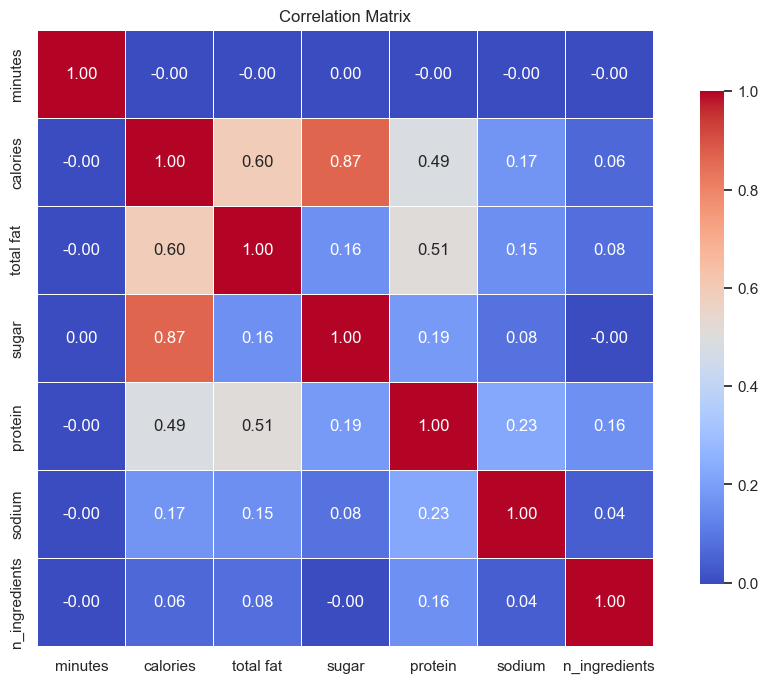

In [95]:
# Assuming 'food3' is your DataFrame in Python
corr_values = df[['minutes', 'calories', 'total fat', 'sugar', 'protein', 'sodium', 'n_ingredients']].dropna()

# Calculate the correlation matrix using pandas
corrmat1 = corr_values.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corrmat1, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.8})

plt.title("Correlation Matrix")
plt.show()

In [42]:
df.dtypes

name                      object
id                         int64
minutes                    int64
contributor_id             int64
submitted         datetime64[ns]
tags                      object
nutrition                 object
n_steps                    int64
steps                     object
description               object
ingredients               object
n_ingredients              int64
calories                 float64
total fat                float64
sugar                    float64
sodium                   float64
protein                  float64
saturated fat            float64
carbohydrates            float64
dtype: object

In [45]:
df['tags'] = df['tags'].apply(lambda x: literal_eval(str(x)))

In [48]:
df['vegetarian'] = ['vegetarian' in tag for tag in df['tags']]
df['vegan'] = ['vegan' in tag for tag in df['tags']]
df = df.drop(columns=['name', 'tags', 'nutrition', 'steps', 'description', 'ingredients'])
df.head(2)

,id,minutes,contributor_id,submitted,n_steps,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,vegetarian,vegan
0,137739,55,47892,2005-09-16,11,7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,True,False
1,31490,30,26278,2002-06-17,9,6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,False,False


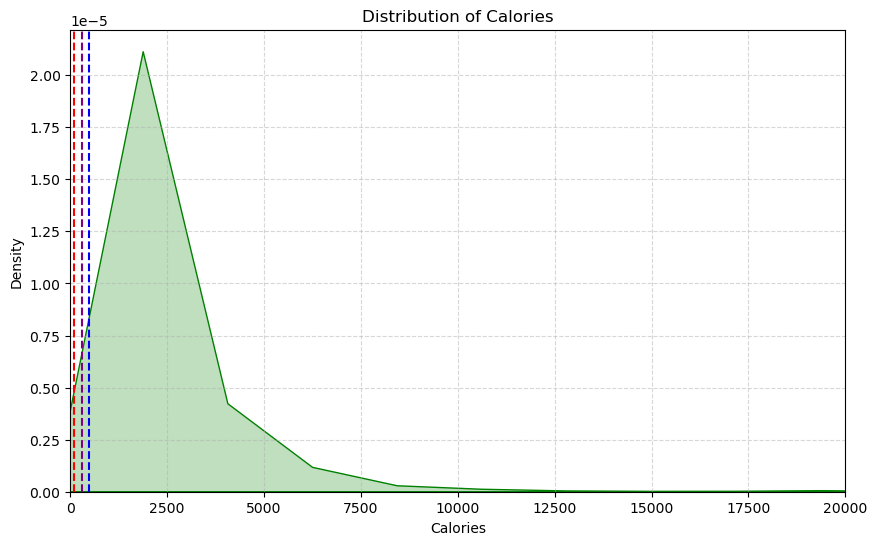

In [64]:
df_copy = df[['calories']].copy()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_copy, x='calories', fill=True, color="green")

peak_value = df_copy['calories'].mode().values[0]

plt.axvline(x=peak_value, color='red', linestyle='--', label=f'Peak Value: {peak_value:.2f}')

mean_calories = df_copy['calories'].mean()
median_calories = df_copy['calories'].median()

plt.axvline(x=mean_calories, color='blue', linestyle='--', label=f'Mean: {mean_calories:.2f}')
plt.axvline(x=median_calories, color='purple', linestyle='--', label=f'Median: {median_calories:.2f}')

plt.xlabel('Calories')
plt.title('Distribution of Calories')
plt.xlim(0, 20000)

plt.grid(True, linestyle='--', alpha=0.5)

plt.legend()

plt.show()

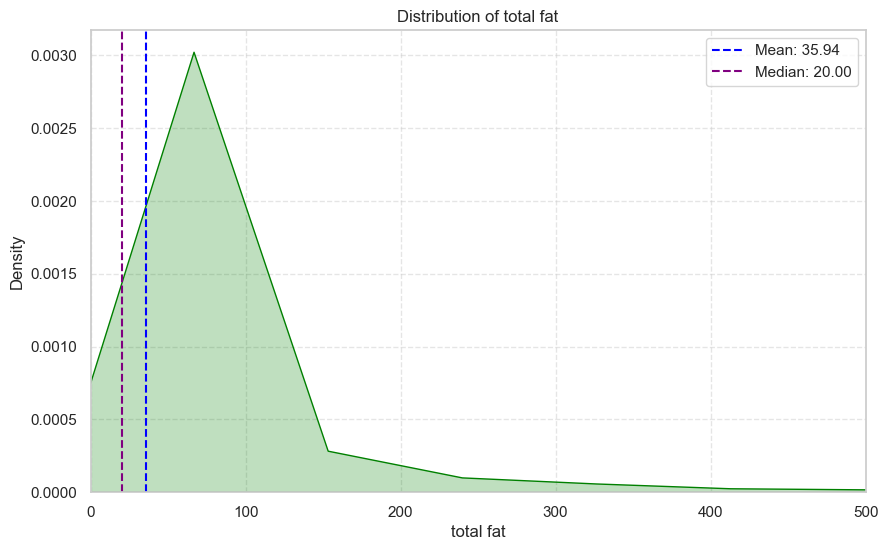

In [81]:
df_copy = df[['total fat']].copy()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_copy, x='total fat', fill=True, color="green")

#peak_value = df_copy['total fat'].mode().values[0]

#plt.axvline(x=peak_value, color='red', linestyle='--', label=f'Peak Value: {peak_value:.2f}')

mean_calories = df_copy['total fat'].mean()
median_calories = df_copy['total fat'].median()

plt.axvline(x=mean_calories, color='blue', linestyle='--', label=f'Mean: {mean_calories:.2f}')
plt.axvline(x=median_calories, color='purple', linestyle='--', label=f'Median: {median_calories:.2f}')

plt.xlabel('total fat')
plt.title('Distribution of total fat')
plt.xlim(0,500)

plt.grid(True, linestyle='--', alpha=0.5)

plt.legend()

plt.show()

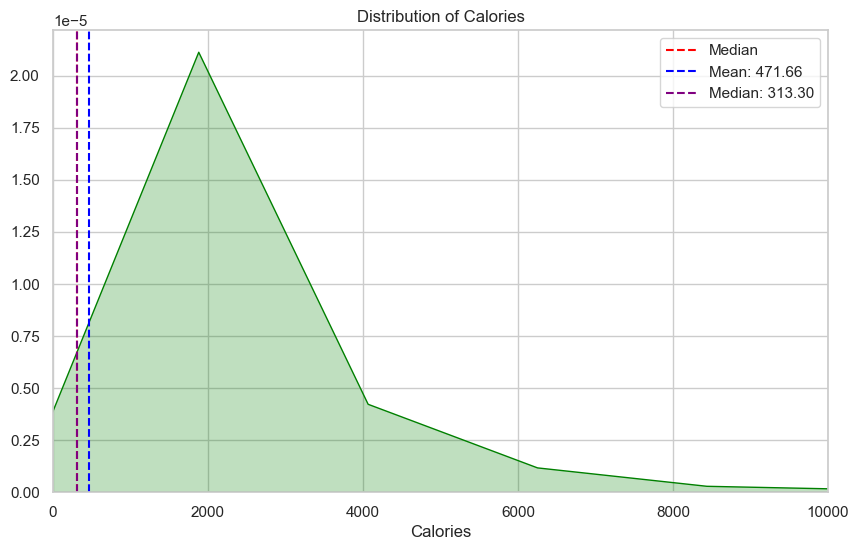

In [78]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
mean_calories = df['calories'].mean()
median_calories = df['calories'].median()
sns.kdeplot(data=df, x="calories", fill=True, color="green")
plt.axvline(x=df['calories'].median(), color='red', linestyle='--', label='Median')
plt.axvline(x=mean_calories, color='blue', linestyle='--', label=f'Mean: {mean_calories:.2f}')
plt.axvline(x=median_calories, color='purple', linestyle='--', label=f'Median: {median_calories:.2f}')
# plt.xscale('log')  # Use 'log' instead of 'log10'

plt.xlabel("Calories")
plt.ylabel(None)
plt.title("Distribution of Calories")
plt.xlim(0,10000)

plt.legend()
plt.show()

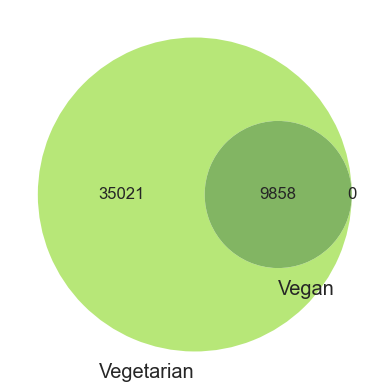

In [86]:
from matplotlib_venn import venn2

vegetarian_cnt = len(df.query('vegetarian == True'))
vegan_cnt = len(df.query('vegan == True'))
intersect_cnt = len(df.query('vegetarian == True and vegan == True'))

venn2(subsets = (vegetarian_cnt, vegan_cnt-intersect_cnt, intersect_cnt), set_labels = ('Vegetarian', 'Vegan'), set_colors=('#b7e778', '#031c16', '#031c16'), alpha = 1)

In [102]:
food = pd.merge(df, dff, how='inner', left_on='id', right_on='recipe_id')

In [103]:
ingredients = food[['ingredients', 'rating']]
ingredients = ingredients.assign(ingredients=ingredients['ingredients'].str.split(', ')).explode('ingredients')
ingredients['ingredients'] = ingredients['ingredients'].str.replace(r'\[|\]|\'', '')

# Grouping and summarizing
ingredients2 = ingredients.groupby('ingredients').agg(count=('ingredients', 'size'), avg_rating=('rating', 'mean')).reset_index()

# Displaying the top 10 rows
top_ingredients2 = ingredients2.sort_values(by='count', ascending=False).head(10)
print(top_ingredients2)


C:\Users\preet\AppData\Local\Temp\ipykernel_3212\385108728.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  ingredients['ingredients'] = ingredients['ingredients'].str.replace(r'\[|\]|\'', '')


         ingredients   count  avg_rating
11752           salt  468403    4.388740
1841          butter  299645    4.406434
12893          sugar  233854    4.369902
9444           onion  193779    4.403186
14286          water  181780    4.343663
4602            eggs  178000    4.353152
5072           flour  154306    4.337997
9427       olive oil  151781    4.467344
8769            milk  140283    4.343413
5818   garlic cloves  119550    4.432923


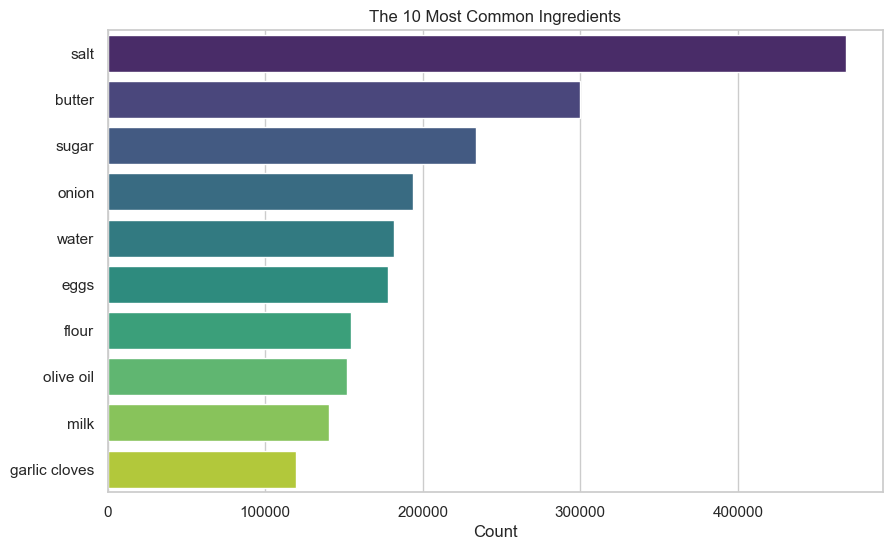

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [104]:
import plotly.express as px

top_ingredients = ingredients2.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='ingredients', data=top_ingredients, palette='viridis')
plt.xlabel("Count")
plt.ylabel(None)
plt.title("The 10 Most Common Ingredients")
plt.show()
fig = px.bar(top_ingredients, x='count', y='ingredients', orientation='h',
             title="The 10 Most Common Ingredients", labels={'count': 'Count', 'ingredients': None},
             template='plotly_dark', color='count')
fig.show()

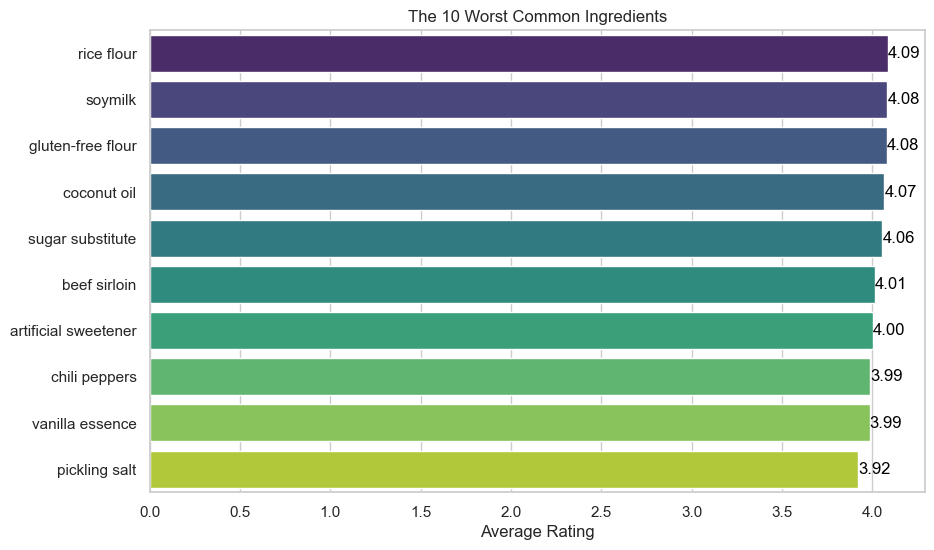

In [105]:
filtered_ingredients = ingredients2[ingredients2['count'] >= 500]
worst_ingredients = filtered_ingredients.sort_values(by='avg_rating', ascending=False).tail(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='avg_rating', y='ingredients', data=worst_ingredients, palette='viridis')
plt.xlabel("Average Rating")
plt.ylabel(None)
plt.title("The 10 Worst Common Ingredients")

for index, value in enumerate(worst_ingredients['avg_rating']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black')

plt.show()

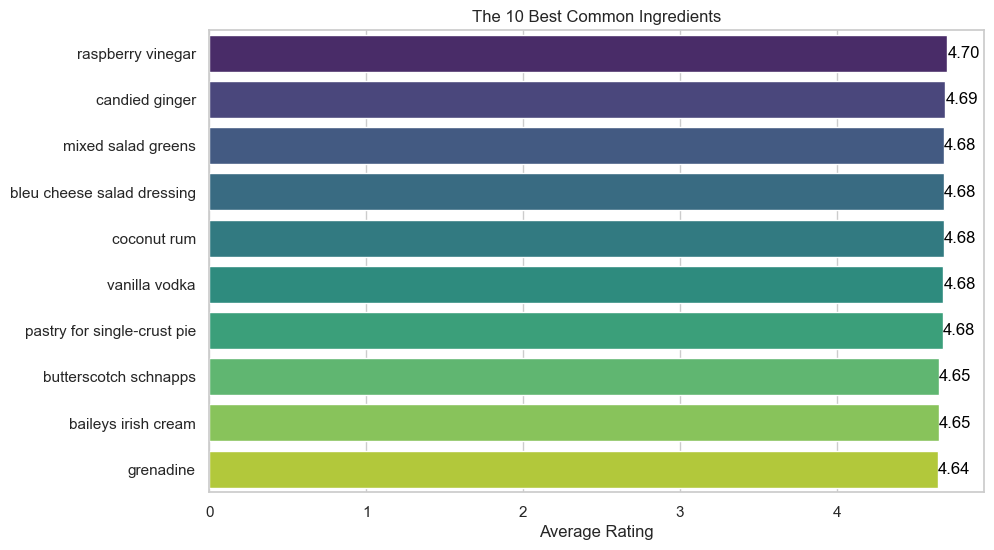

In [106]:
filtered_ingredients = ingredients2[ingredients2['count'] >= 500]
best_ingredients = filtered_ingredients.sort_values(by='avg_rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_rating', y='ingredients', data=best_ingredients, palette='viridis')
plt.xlabel("Average Rating")
plt.ylabel(None)
plt.title("The 10 Best Common Ingredients")
for index, value in enumerate(best_ingredients['avg_rating']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black')

plt.show()


In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


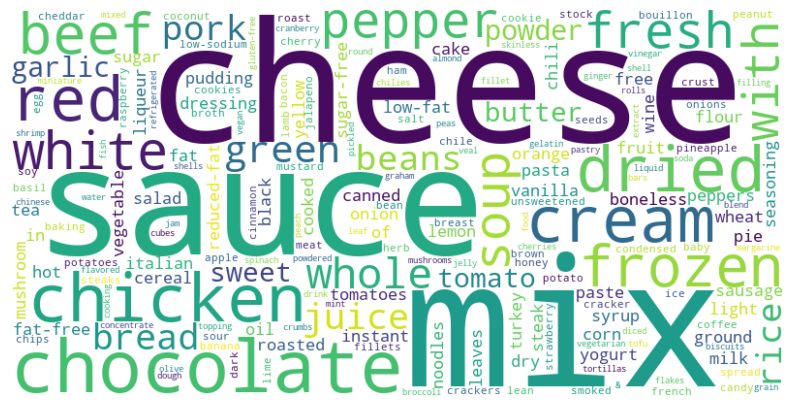

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords')

# Assuming 'ingredients2' is your DataFrame in Python
ingred = ingredients2['ingredients'].str.split(expand=True).stack().reset_index(level=0).rename(columns={0: 'ingredients'})
ingred['ingredients'] = ingred['ingredients'].str.replace('"', '')

# Grouping and summarizing
ingred_count = ingred.groupby('ingredients').size().reset_index(name='n')
ingred_count = ingred_count[~ingred_count['ingredients'].isin(['s', 'the', 'and', 'or', 'a', ''])]

# Convert to dictionary
wordcloud_data = dict(zip(ingred_count['ingredients'], ingred_count['n']))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white', random_state=42).generate_from_frequencies(wordcloud_data)

# Display the generated word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


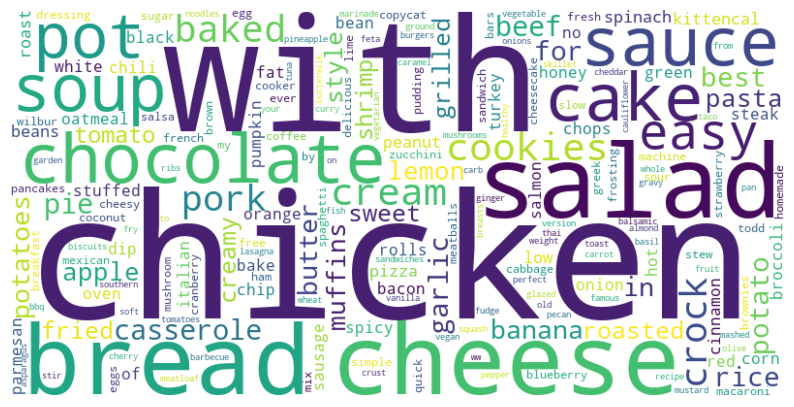

In [117]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords')

# Assuming 'text_food' is your DataFrame in Python
names = food['name'].str.split(expand=True).stack().reset_index(level=0).rename(columns={0: 'name'})
names_count = names.groupby('name').size().reset_index(name='n')
names_count = names_count[~names_count['name'].isin(['s', 'the', 'and', 'or', 'a', ''])]

# Convert to dictionary
wordcloud_data = dict(zip(names_count['name'], names_count['n']))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white', random_state=42).generate_from_frequencies(wordcloud_data)

# Display the generated word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
